regression exercise

written by Gaurav Bhardwaj

for PUI lecture on models and linear regression

investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP

In [74]:
import pandas as pd
import numpy as np
import pylab as pl
import scipy as sp
import os
from scipy import stats as st
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sn
import sklearn as sk
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [75]:
data=os.getenv("PUIDATA")

In [165]:
df=pd.read_csv(data+'/Assign5_3_data.csv',encoding="latin-1")

In [166]:
df.head()

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0
3,Anguilla,AI,WHO-MDB,24.0,1.0,7.14,NaN,NaN,NaN
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0


In [167]:
df.columns

Index(['Country/Territory', 'ISO code', 'Source', '% of homicides by firearm',
       'Number of homicides by firearm',
       'Homicide by firearm rate per 100,000 pop', 'Rank by rate of ownership',
       'Average firearms per 100 people',
       'Average total all civilian firearms'],
      dtype='object')

In [168]:
lis=list(['ISO code','Source','% of homicides by firearm','Homicide by firearm rate per 100,000 pop','Rank by rate of ownership','Average firearms per 100 people'])

In [169]:
df.drop(lis,axis=1,inplace=True)

In [170]:
df.head()

,Country/Territory,Number of homicides by firearm,Average total all civilian firearms
0,Albania,56.0,270000.0
1,Algeria,20.0,1900000.0
2,Angola,NaN,2800000.0
3,Anguilla,1.0,NaN
4,Argentina,1198.0,3950000.0


In [171]:
df1=pd.read_csv(data+'/data-pvLFI.csv')

In [172]:
df1.head()

,Country,Guns/100 inhabitants,Number of mass shootings
0,Australia,15.0,4
1,Austria,30.4,1
2,Beligium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [173]:
df2=pd.read_csv(data+'/Population_csv.csv',skiprows=4)

In [174]:
df2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,NaN


In [175]:
df2.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', 'Unnamed: 61'],
      dtype='object')

In [176]:
df2.drop(['Country Code', 'Indicator Name', 'Indicator Code','1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968','1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977','1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986','1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995','1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004','2005', '2006', '2007', '2008', '2009', '2010', '2011', '2013','2014', '2015', '2016', 'Unnamed: 61'],axis=1,inplace=True)

In [177]:
df2.head()

,Country Name,2012
0,Aruba,102577.0
1,Afghanistan,30696958.0
2,Angola,25096150.0
3,Albania,2900401.0
4,Andorra,82431.0


In [178]:
df3=pd.read_csv(data+'/GDP_csv.csv',skiprows=4)

In [179]:
df3.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.970299e+10,1.946902e+10,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.417803e+10,7.549238e+10,8.247091e+10,1.041159e+11,1.153984e+11,1.249121e+11,1.267769e+11,1.029622e+11,8.963316e+10,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.278103e+10,1.321986e+10,1.139037e+10,1.192689e+10,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.001201e+09,3.650083e+09,3.346517e+09,3.427023e+09,3.146152e+09,3.248925e+09,NaN,NaN,NaN,NaN


In [180]:
df3.drop(['Country Code', 'Indicator Name', 'Indicator Code','1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968','1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977','1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986','1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995','1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004','2005', '2006', '2007', '2008', '2009', '2010', '2011', '2013','2014', '2015', '2016', 'Unnamed: 61'],axis=1,inplace=True)

In [181]:
df3.head()

,Country Name,2012
0,Aruba,NaN
1,Afghanistan,2.053654e+10
2,Angola,1.153984e+11
3,Albania,1.231978e+10
4,Andorra,3.146152e+09


In [182]:
df= df.merge(df2, right_on="Country Name", left_on="Country/Territory")

In [183]:
df.head()

,Country/Territory,Number of homicides by firearm,Average total all civilian firearms,Country Name,2012
0,Albania,56.0,270000.0,Albania,2900401.0
1,Algeria,20.0,1900000.0,Algeria,37565847.0
2,Angola,NaN,2800000.0,Angola,25096150.0
3,Argentina,1198.0,3950000.0,Argentina,42096739.0
4,Armenia,9.0,380000.0,Armenia,2881922.0


In [184]:
df= df.merge(df1, right_on="Country", left_on="Country/Territory")

In [185]:
df= df.merge(df3, right_on="Country Name", left_on="Country/Territory")

In [186]:
df

,Country/Territory,Number of homicides by firearm,Average total all civilian firearms,Country Name_x,2012_x,Country,Guns/100 inhabitants,Number of mass shootings,Country Name_y,2012_y
0,Australia,30.0,3050000.0,Australia,22728254.0,Australia,15.0,4,Australia,1.538194e+12
1,Austria,18.0,2500000.0,Austria,8429991.0,Austria,30.4,1,Austria,4.074516e+11
2,Canada,173.0,9950000.0,Canada,34750545.0,Canada,30.8,4,Canada,1.824289e+12
3,Denmark,15.0,650000.0,Denmark,5591572.0,Denmark,12.0,0,Denmark,3.271489e+11
4,Finland,24.0,2400000.0,Finland,5413971.0,Finland,45.3,2,Finland,2.567065e+11
5,France,35.0,19000000.0,France,65659790.0,France,31.2,6,France,2.681416e+12
6,Germany,158.0,25000000.0,Germany,80425823.0,Germany,30.3,7,Germany,3.543984e+12
7,Greece,29.0,2500000.0,Greece,11045011.0,Greece,22.5,0,Greece,2.456707e+11
8,Hungary,7.0,560000.0,Hungary,9920362.0,Hungary,5.5,0,Hungary,1.273211e+11
9,Iceland,0.0,90000.0,Iceland,320716.0,Iceland,30.3,0,Iceland,1.421858e+10


In [187]:
df.rename(columns={'2012_x': 'pop','2012_y': 'gdp'}, inplace=True)

In [188]:
df.drop(['Country Name_y','Country/Territory'],axis=1,inplace=True)

In [189]:
#df.drop(['Country'],axis=1,inplace=True)

In [190]:
df.rename(columns={'Country Name_x': 'Country Name'}, inplace=True)

In [191]:
cols = df.columns.tolist()

In [192]:
cols

['Number of homicides by firearm',
 'Average total all civilian firearms',
 'Country Name',
 'pop',
 'Country',
 'Guns/100 inhabitants',
 'Number of mass shootings',
 'gdp']

In [193]:
cols=['Country Name','Average total all civilian firearms','pop','gdp','Number of homicides by firearm','Country','Guns/100 inhabitants','Number of mass shootings']

In [194]:
cols

['Country Name',
 'Average total all civilian firearms',
 'pop',
 'gdp',
 'Number of homicides by firearm',
 'Country',
 'Guns/100 inhabitants',
 'Number of mass shootings']

In [195]:
df = df[cols] 

In [196]:
df.head()

,Country Name,Average total all civilian firearms,pop,gdp,Number of homicides by firearm,Country,Guns/100 inhabitants,Number of mass shootings
0,Australia,3050000.0,22728254.0,1.538194e+12,30.0,Australia,15.0,4
1,Austria,2500000.0,8429991.0,4.074516e+11,18.0,Austria,30.4,1
2,Canada,9950000.0,34750545.0,1.824289e+12,173.0,Canada,30.8,4
3,Denmark,650000.0,5591572.0,3.271489e+11,15.0,Denmark,12.0,0
4,Finland,2400000.0,5413971.0,2.567065e+11,24.0,Finland,45.3,2



## exploration

### plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?

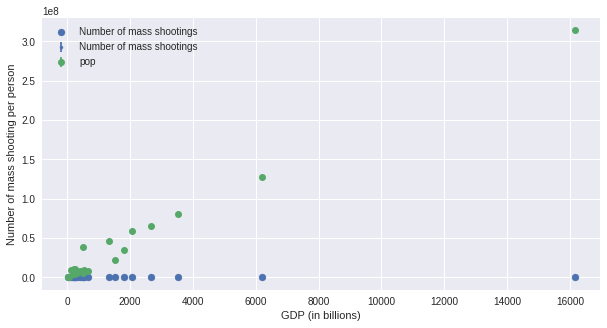

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [197]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df.gdp / 1e9, df['Number of mass shootings'])
ax.errorbar(df.gdp / 1e9, df['Number of mass shootings'], 
            yerr = np.sqrt(df['Number of mass shootings'] * 1.0), fmt = '.')
ax.errorbar(df.gdp / 1e9, df['pop'], 
            yerr = np.sqrt(df['pop'] * 1.0), fmt = 'o')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
ax.legend(loc='best')
pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")

### Do per person version of it

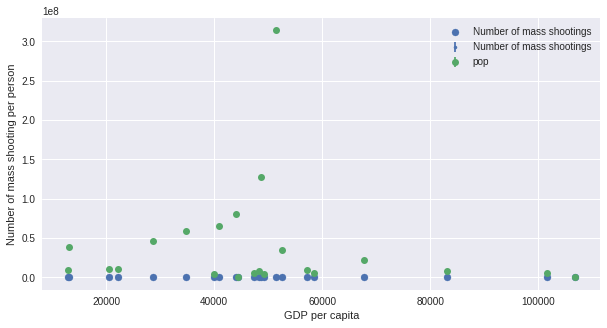

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [198]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df.gdp/df['pop'] , df['Number of mass shootings'])
ax.errorbar(df.gdp/df['pop'] , df['Number of mass shootings'], 
            yerr = np.sqrt(df['Number of mass shootings'] * 1.0), fmt = '.')
ax.errorbar(df.gdp/df['pop'] , df['pop'], 
            yerr = np.sqrt(df['pop'] * 1.0), fmt = 'o')
ax.set_xlabel("GDP per capita")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
ax.legend(loc='best')
pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")

### plot the average number of civilian fire arms per person

first without errors, then with errors. are there points that look like outliers?

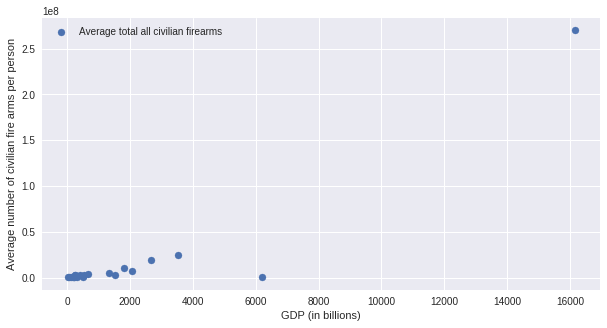

Number of average number of civilian fire arms vs GDP, The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [199]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df.gdp / 1e9, df['Average total all civilian firearms'])

ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Average number of civilian fire arms per person")
ax.set_ylim()
ax.legend(loc='best')
pl.show()
print ("Number of average number of civilian fire arms vs GDP, " +
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")

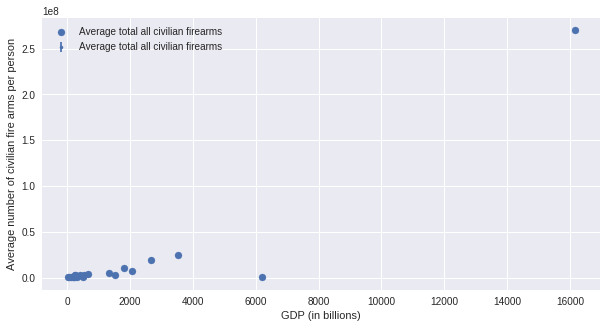

Number of average number of civilian fire arms vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [200]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df.gdp / 1e9, df['Average total all civilian firearms'])
ax.errorbar(df.gdp / 1e9, df['Average total all civilian firearms'], 
            yerr = np.sqrt(df['Average total all civilian firearms'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Average number of civilian fire arms per person")
ax.set_ylim()
ax.legend(loc='best')
pl.show()
print ("Number of average number of civilian fire arms vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")

In [201]:
df['shootingspp'] = df["Number of mass shootings"] / df['pop'] * 1e6

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [202]:
df.tail()

,Country Name,Average total all civilian firearms,pop,gdp,Number of homicides by firearm,Country,Guns/100 inhabitants,Number of mass shootings,shootingspp
17,Portugal,900000.0,10514844.0,2.163682e+11,44.0,Portugal,8.5,1,0.095104
18,Spain,4500000.0,46773055.0,1.335946e+12,90.0,Spain,10.4,1,0.021380
19,Sweden,2800000.0,9519374.0,5.438806e+11,37.0,Sweden,31.6,2,0.210098
20,Switzerland,3400000.0,7996861.0,6.650541e+11,57.0,Switzerland,45.7,2,0.250098
21,United States,270000000.0,313998379.0,1.615526e+13,9146.0,United States,88.8,78,0.248409


### plot the average number of homicide by fire arms per person

first as a histogram

then against the country GDP, with statistical errors. are there points that look like outliers?

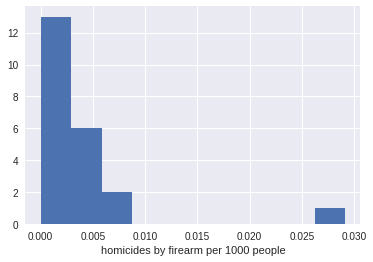

In [203]:
fig, ax = plt.subplots()
ax.hist(df['Number of homicides by firearm'] / df['pop'] * 1000)
ax.set_xlabel('homicides by firearm per 1000 people');

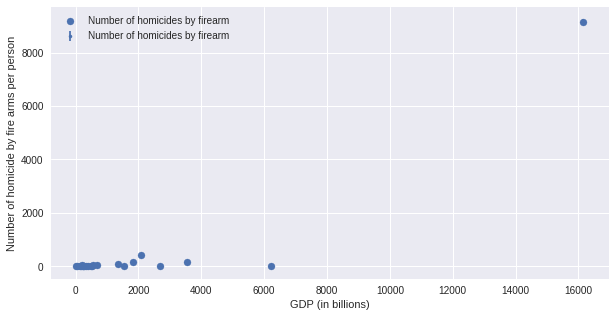

Number of average number of civilian fire arms vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [204]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df.gdp / 1e9, df['Number of homicides by firearm'])
ax.errorbar(df.gdp / 1e9, df['Number of homicides by firearm'], 
            yerr = np.sqrt(df['Number of homicides by firearm'] * 1.0), fmt = '.')

ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of homicide by fire arms per person")
ax.set_ylim()
ax.legend(loc='best')
pl.show()
print ("Number of average number of civilian fire arms vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")

### plot the number of homicides by fire arm against the number of civilian firearms. plot the US in a different color

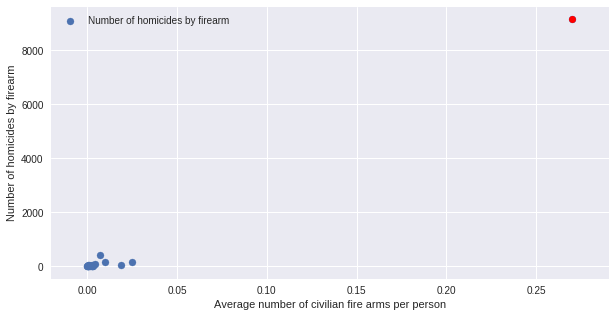

Number of homicides by firearm vs average number of civilian fire arms , The datapoint to the top right of the plot is the USA, which has the highest Average number of civilian fire arms and the highest number of mass shootings


In [205]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df['Average total all civilian firearms'] / 1e9, df['Number of homicides by firearm'])
for i in range(len(df.Country)):
    if df['Country'][i]=='United States':
        pl.plot(df['Average total all civilian firearms'][i] / 1e9, df['Number of homicides by firearm'][i],'ro') ## Data point of US will be displayed red
ax.set_xlabel("Average number of civilian fire arms per person")
ax.set_ylabel("Number of homicides by firearm")
ax.set_ylim()
ax.legend(loc='best')
pl.show()
print ("Number of homicides by firearm vs average number of civilian fire arms , " +
       "The datapoint to the top right of the plot is the USA, " + 
       "which has the highest Average number of civilian fire arms and the highest number of mass shootings")

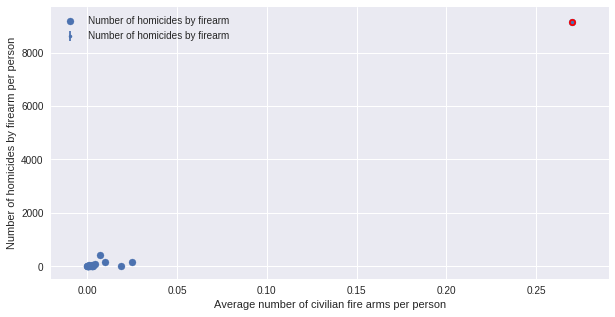

Number of homicides by firearm vs average number of civilian fire arms , The datapoint to the top right of the plot is the USA, which has the highest Average number of civilian fire arms and the highest number of mass shootings


In [206]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df['Average total all civilian firearms'] / 1e9, df['Number of homicides by firearm'])
for i in range(len(df.Country)):
    if df['Country'][i]=='United States':
        pl.plot(df['Average total all civilian firearms'][i] / 1e9, df['Number of homicides by firearm'][i],'ro') ## Data point of US will be displayed red
ax.errorbar(df['Average total all civilian firearms'] / 1e9, df['Number of homicides by firearm'], 
            yerr = np.sqrt(df['Number of homicides by firearm'] * 1.0), fmt = '.')
        
ax.set_xlabel("Average number of civilian fire arms per person")
ax.set_ylabel("Number of homicides by firearm per person")
ax.set_ylim()
ax.legend(loc='best')
pl.show()
print ("Number of homicides by firearm vs average number of civilian fire arms , " +
       "The datapoint to the top right of the plot is the USA, " + 
       "which has the highest Average number of civilian fire arms and the highest number of mass shootings")

### plot the number of mass shootings against the number of civilian firearms. plot the US in a different color

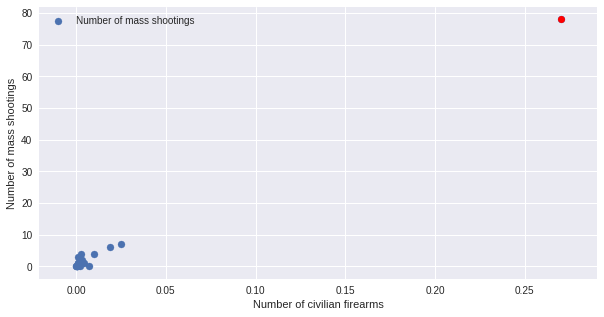

Average number of mass shootings vs average number of civilian fire arms , The datapoint to the top right of the plot is the USA, which has the highest Average number of civilian fire arms and the highest number of mass shootings


In [207]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df['Average total all civilian firearms'] / 1e9, df['Number of mass shootings'])
for i in range(len(df.Country)):
    if df['Country'][i]=='United States':
        pl.plot(df['Average total all civilian firearms'][i] / 1e9, df['Number of mass shootings'][i],'ro') ## Data point of US will be displayed red
ax.set_xlabel("Number of civilian firearms")
ax.set_ylabel("Number of mass shootings")
ax.set_ylim()
ax.legend(loc='best')
pl.show()
print ("Average number of mass shootings vs average number of civilian fire arms , " +
       "The datapoint to the top right of the plot is the USA, " + 
       "which has the highest Average number of civilian fire arms and the highest number of mass shootings")

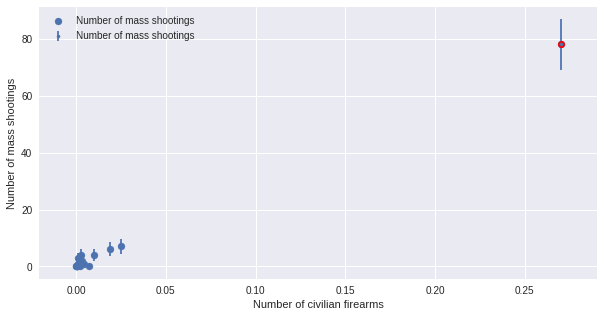

Average number of mass shootings vs average number of civilian fire arms , The datapoint to the top right of the plot is the USA, which has the highest Average number of civilian fire arms and the highest number of mass shootings


In [209]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df['Average total all civilian firearms']/ 1e9,df['Number of mass shootings']  )
for i in range(len(df.Country)):
    if df['Country'][i]=='United States':
        pl.plot(df['Average total all civilian firearms'][i] / 1e9, df['Number of mass shootings'][i],'ro') ## Data point of US will be displayed red
ax.errorbar( df['Average total all civilian firearms']/ 1e9,df['Number of mass shootings'] , 
            yerr = np.sqrt(df['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("Number of civilian firearms")
ax.set_ylabel("Number of mass shootings")
ax.set_ylim()
ax.legend(loc='best')
pl.show()
print ("Average number of mass shootings vs average number of civilian fire arms , " +
       "The datapoint to the top right of the plot is the USA, " + 
       "which has the highest Average number of civilian fire arms and the highest number of mass shootings")

## Modeling
### fit a line to the Number of mass shootings per person as a function of Average total all civilian firearms per person.

Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use
- statsmodels OLS
- statsmodels WLS
- seaborn
- choose one of
    -- creating a function that calculates the residuals and minimizing that function
    -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
    -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html


WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors: weights = 1.0/df.yerror Notice that a - sqrt(0) = 0 b - 1/0 = infinity c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.
the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb Since we did not discuss these, I will add some notes to the repo in the afternoon.
Use the seaborn python package built in regression function to plot the regression confidence intervals.
import seaborn as sns sns.regplot(x="x", y="y", data=df);

In [210]:
df['civ_fireamspp']=df['Average total all civilian firearms']/df['pop'] 

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [211]:
df.head()

,Country Name,Average total all civilian firearms,pop,gdp,Number of homicides by firearm,Country,Guns/100 inhabitants,Number of mass shootings,shootingspp,civ_fireamspp
0,Australia,3050000.0,22728254.0,1.538194e+12,30.0,Australia,15.0,4,0.175992,0.134194
1,Austria,2500000.0,8429991.0,4.074516e+11,18.0,Austria,30.4,1,0.118624,0.296560
2,Canada,9950000.0,34750545.0,1.824289e+12,173.0,Canada,30.8,4,0.115106,0.286326
3,Denmark,650000.0,5591572.0,3.271489e+11,15.0,Denmark,12.0,0,0.000000,0.116246
4,Finland,2400000.0,5413971.0,2.567065e+11,24.0,Finland,45.3,2,0.369415,0.443298


In [212]:
dummy_df=pd.DataFrame(df['shootingspp'])

In [215]:
dummy_df['civfirearm']=df.civ_fireamspp

In [216]:
dummy_df.columns=['shootings','civfirearm']

In [217]:
lm=smf.ols('shootings~civfirearm',data=dummy_df).fit()

In [218]:
print(lm.params,'\n',lm.rsquared)

Intercept     0.031488
civfirearm    0.391060
dtype: float64 
 0.199063858524


In [219]:
dummy_df['yerr'] = np.sqrt(df['Number of mass shootings'] * 1.0)
dummy_df['weight'] = 1.0 / dummy_df.yerr
dummy_df=dummy_df.replace([np.inf, -np.inf], 1)
wl=smf.wls('shootings~civfirearm',data=dummy_df,weights=dummy_df['weight']).fit()
print(wl.params)

Intercept    -0.013493
civfirearm    0.579529
dtype: float64


Text(0,-0.1,'These are the plots for Mass shooting per person against Avrage number of civilan afirearms, its OLS Fit, its WLS fit, Seaborn plot and polyfit for smass shooting .')

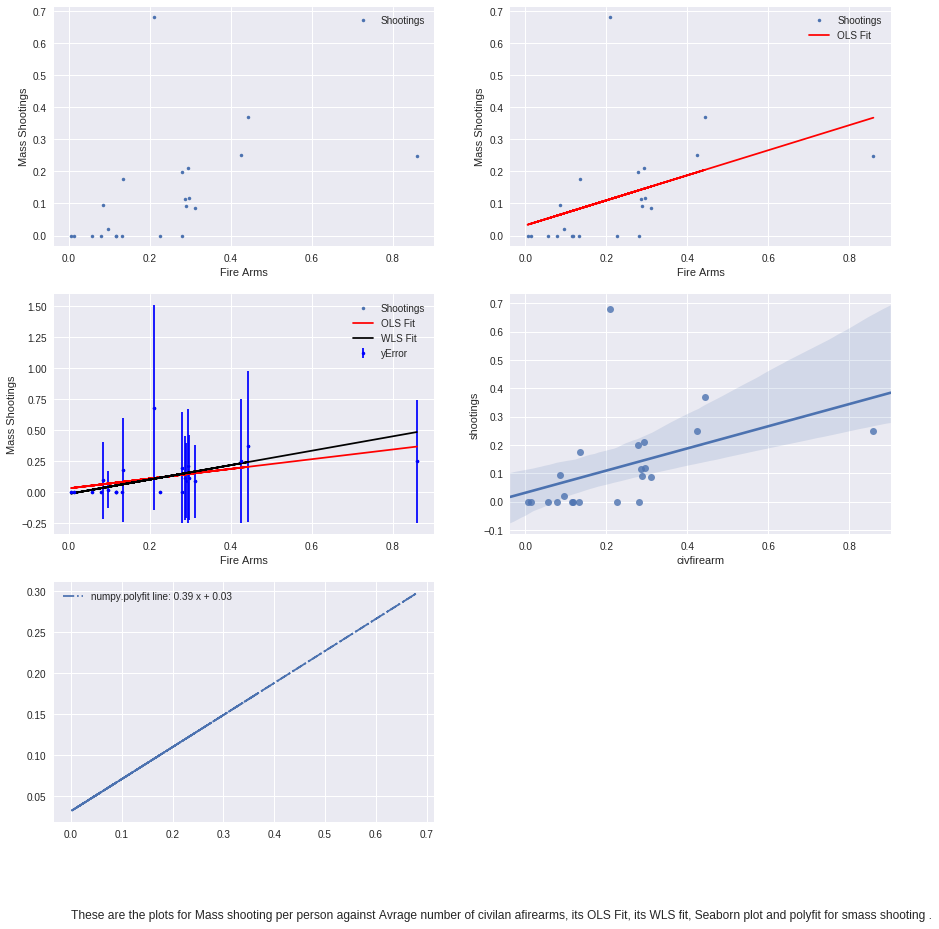

In [220]:
fig=pl.figure(figsize=(15,15))

ax = fig.add_subplot(321)
ax.plot(dummy_df.civfirearm,dummy_df.shootings,'.')
ax.legend(['Shootings'],loc='best')
ax.set_xlabel('Fire Arms')
ax.set_ylabel('Mass Shootings')


ax1=fig.add_subplot(322)
ax1.plot(dummy_df.civfirearm,dummy_df.shootings,'.')
ax1.plot(dummy_df.civfirearm, lm.predict(), color='red')
ax1.legend(['Shootings','OLS Fit'],loc='best')
ax1.set_xlabel('Fire Arms')
ax1.set_ylabel('Mass Shootings')

ax2=fig.add_subplot(323)
ax2.plot(dummy_df.civfirearm,dummy_df.shootings,'.')
ax2.plot(dummy_df.civfirearm, lm.predict(), color='red')
ax2.plot(dummy_df.civfirearm, wl.predict(), color='black')
ax2.errorbar( dummy_df.civfirearm,dummy_df.shootings , 
            yerr = np.sqrt(dummy_df['shootings'] * 1.0), fmt = 'b.')
ax2.legend(['Shootings','OLS Fit','WLS Fit','yError'],loc='best')
ax2.set_xlabel('Fire Arms')
ax2.set_ylabel('Mass Shootings')

ax3=fig.add_subplot(324)
sn.regplot(x=dummy_df.civfirearm,y=dummy_df.shootings,data=dummy_df)

ax4=fig.add_subplot(325)
var,var1=np.polyfit(dummy_df.civfirearm,dummy_df.shootings,1)
ax4.plot(dummy_df.shootings, dummy_df.shootings * var + var1, '-.',label="numpy.polyfit line: %.2f x + %.2f"%(var, var1))
ax4.legend()


ax4.text(0,-0.1,'These are the plots for Mass shooting per person against Avrage number of civilan afirearms, its OLS Fit, its WLS fit, Seaborn plot and polyfit for smass shooting .',fontsize=12)

### Extra credit: calculate the confidence interval by hand and also plot them

you can use pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)

#### Confidence intervals:
there are three type of intervals in a linear regression, plot any one of them all three if you want - how do they compare to the seaborn plot?:

1) Confidence intervals for the parameters slope and intercept

2) Confidence interval for the average y value

3) Prediction interval for a single y value

##### 1) confidence interval of the model parameters slope and intercept: define sigma as the sum of the residuals over the square root of number n of observations.

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy tp = sp.stats.t.ppf(0.975, n-2)


##### 2) A confidence interval for E(y | x) , the expected (average) value of y for a given x_
define s: residual standard error sy = sqrt(Sum((y_observed-y_predicted)^2)/(n-2))

(note: n-2 is the degrees of freedom of the problem: observations - number of parameters - 1)

the confidence interval for a given y(x*) is:

ypredicted(x*) +/- t(alpha/2)(n-2) sy sqrt( 1/n + (x - mean(x)^2) / sum((x - mean(x)^2)

##### 3) Confidence intervals for average y (predicted) values

ypredicted(x*) +/- t(n-2) sy sqrt( 1 + 1/n + (x - mean(x)^2) / sum((x - mean(x)^2)

very similar, but note the +1 in the square root

In [221]:
residual=dummy_df.shootings- lm.predict()
yfit=dummy_df.shootings * var + var1
sigma=np.sqrt(np.sum(residual)**2/len(dummy_df))
tp = sp.stats.t.ppf(0.975, len(dummy_df)-2)
sy=np.sqrt(np.sum(residual**2)/(len(dummy_df)-2))

In [222]:
ci=tp * sy* np.sqrt( 1/len(dummy_df) + (dummy_df.civfirearm - (np.mean(dummy_df.civfirearm))**2 ) / sum(dummy_df.civfirearm - (np.mean(dummy_df.civfirearm))**2) )

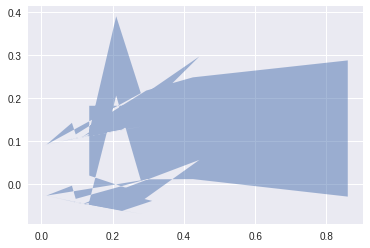

In [223]:
pl.fill_between(dummy_df.civfirearm,yfit-ci,yfit+ci,alpha=0.5)

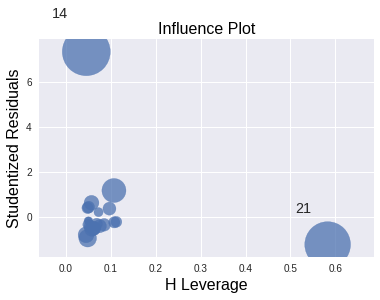

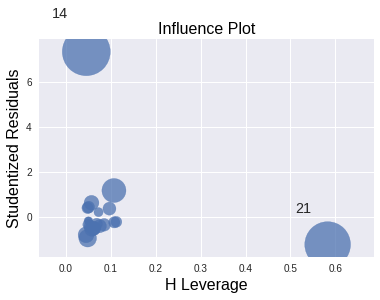

In [224]:
sm.graphics.influence_plot(lm, alpha  = 0.05, criterion='cook')

In [ ]:
sm.graphics.influence_plot?

In [ ]:
pl.plot(yfit-ci)

In [ ]:
pl.plot(yfit+ci)

In [ ]:
import os

In [ ]:
print(os.getenv("PUIDATA"))